# Libraries

**Data Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**NLP Text Libraries**

In [2]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**EDA Analysis**

In [3]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud



---



# The Dataset

Bộ dữ liệu mà chúng ta sẽ sử dụng được lấy từ trang web Kaggle và có thể tải xuống tại đây: Amazon Musical Instruments Reviews
Tổng thể, bộ dữ liệu phản ánh những phản hồi mà khách hàng đưa ra sau khi mua nhạc cụ từ Amazon.
Bộ dữ liệu mà chúng ta sẽ sử dụng được lấy từ trang web Kaggle và có thể tải xuống tại đây: Amazon Musical Instruments Reviews
Tổng thể, bộ dữ liệu phản ánh những phản hồi mà khách hàng đưa ra sau khi mua nhạc cụ từ Amazon.


**Read The Dataset**

In [4]:
dataset = pd.read_csv("Instruments_Reviews.csv")

**Shape of The Dataset**

In [5]:
dataset.shape

(10261, 9)

– Bộ dữ liệu gồm 10.261 dòng và 9 cột.



---



# Data Preprocessing

**Checking Null Values**

In [6]:
dataset.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

*Có hai cột trong bộ dữ liệu chứa giá trị null: reviewText và reviewerName. Chúng ta không thể loại bỏ những dòng này vì các đánh giá và tóm tắt do khách hàng cung cấp sẽ ảnh hưởng đến mô hình của chúng ta sau này (mặc dù số dòng bị thiếu là ít). Do đó, chúng ta có thể điền giá trị trống vào những ô bị thiếu .*

**Filling Missing Values**

In [7]:
dataset.reviewText.fillna(value = "", inplace = True)
dataset.reviewerName.fillna(value = "", inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18140\3657289931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.reviewText.fillna(value = "", inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18140\3657289931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

**Concatenate `reviewText` and `summary` Columns**

In [8]:
dataset["reviews"] = dataset["reviewText"] + " " + dataset["summary"]
dataset.drop(columns = ["reviewText", "summary"], axis = 1, inplace = True)

**Statistic Description of The Dataset**

In [9]:
dataset.describe(include = "all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
count,10261,10261,10261,10261,10261.000000,1.026100e+04,10261,10261
unique,1429,900,1398,269,NaN,NaN,1570,10261
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013","Not much to write about here, but it does exac..."
freq,42,163,66,6796,NaN,NaN,40,1
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN


**Percentages of Ratings Given from The Customers**

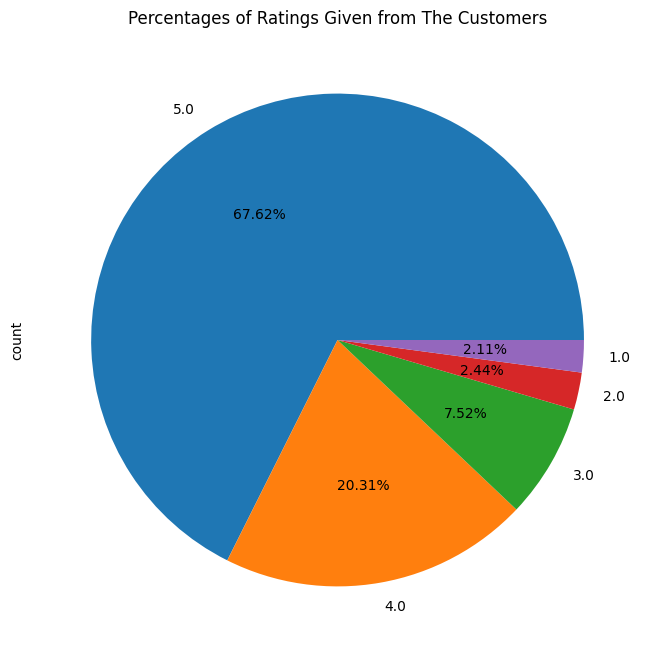

In [10]:
dataset.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

*Từ biểu đồ trên, phần lớn các nhạc cụ được bán trên Amazon nhận được điểm đánh giá hoàn hảo là 5.0, điều này cho thấy chất lượng sản phẩm khá tốt. Chúng ta có thể quy ước rằng các đánh giá trên 3 là Positive, đánh giá bằng 3 là Neutral , và đánh giá dưới 3 là Negative, thì có thể thấy số lượng đánh giá tiêu cực trong bộ dữ liệu là tương đối ít.


**Labelling Products Based On Ratings Given**

In [11]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [12]:
dataset["sentiment"] = dataset.apply(Labelling, axis = 1)

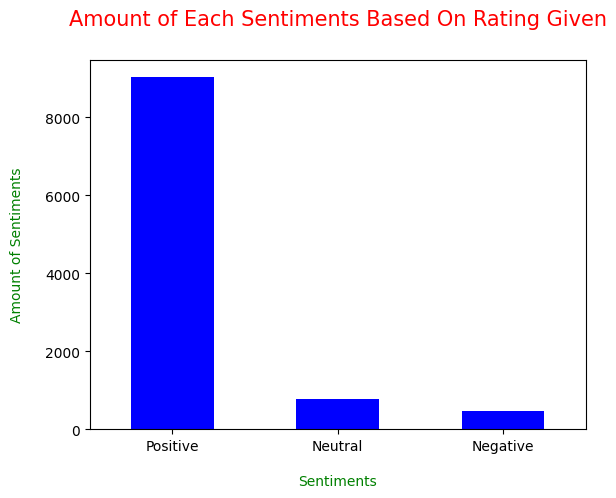

In [13]:
dataset["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()



---



# Text Preprocessing

**Text Cleaning**

In [14]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

**Text Processing**

In [15]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

**Applying The Functions**

*Chuẩn hóa và làm sạch văn bản đánh giá của người dùng để phục vụ cho các tác vụ như phân loại cảm xúc. Trước tiên, hàm Text_Cleaning sẽ xử lý văn bản thô bằng cách chuyển toàn bộ thành chữ thường để tránh phân biệt chữ hoa và chữ thường, sau đó loại bỏ các dấu câu, con số, đường link và ký tự xuống dòng — tất cả những thành phần này thường gây nhiễu và không mang nhiều giá trị cảm xúc.Tiếp theo, hàm Text_Processing sẽ tách câu thành các từ riêng lẻ (tokenization), rồi lọc bỏ các từ dừng (stopwords) như "the", "is", "and",... để tập trung vào các từ mang ý nghĩa. Tuy nhiên, từ "not" được giữ lại vì nó có thể đảo ngược hoàn toàn cảm xúc của câu (ví dụ "not bad" mang nghĩa tích cực). Sau cùng, các từ còn lại được chuẩn hóa về dạng gốc (lemmatization), giúp giảm số lượng từ cần xử lý nhưng vẫn giữ nguyên nghĩa, như đưa "running", "ran" về "run". Như vậy sẽ dễ để sử dụng TF-IDF .*


In [16]:
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Cleaning(Text))
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Processing(Text))



---



# Exploratory Data Analysis

**Overview of The Dataset**

In [17]:
dataset.head(n = 10)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",5.0,1356048000,"12 21, 2012",good bought another one love heavy cord gold c...,Positive
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",5.0,1390089600,"01 19, 2014",used monster cable year good reason lifetime w...,Positive
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",3.0,1353024000,"11 16, 2012",use cable run output pedal chain input fender ...,Neutral
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",5.0,1215302400,"07 6, 2008",perfect epiphone sheraton ii monster cable wel...,Positive
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",5.0,1389139200,"01 8, 2014",monster make best cable lifetime warranty does...,Positive


**About Other Features**

In [18]:
dataset.describe(include = "all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
count,10261,10261,10261,10261,10261.000000,1.026100e+04,10261,10261,10261
unique,1429,900,1398,269,NaN,NaN,1570,10254,3
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013",good string five star,Positive
freq,42,163,66,6796,NaN,NaN,40,3,9022
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN,NaN


*Theo trực giác, các đặc trưng khác trong bộ dữ liệu không thực sự có ảnh hưởng đến việc xác định cảm xúc sau này. Chúng ta có thể cân nhắc sử dụng phần helpful trong mô hình, nhưng như đã thấy trong phần mô tả ở trên, giá trị phổ biến nhất của nó là [0,0], điều này cho thấy hầu hết người dùng không thực sự bỏ phiếu đánh giá. Vì vậy, chúng ta cũng có thể quyết định rằng đặc trưng này không thực sự cần thiết cho mô hình.*

**Polarity, Review Length, and Word Counts**

Polarity

In [19]:
dataset["polarity"] = dataset["reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

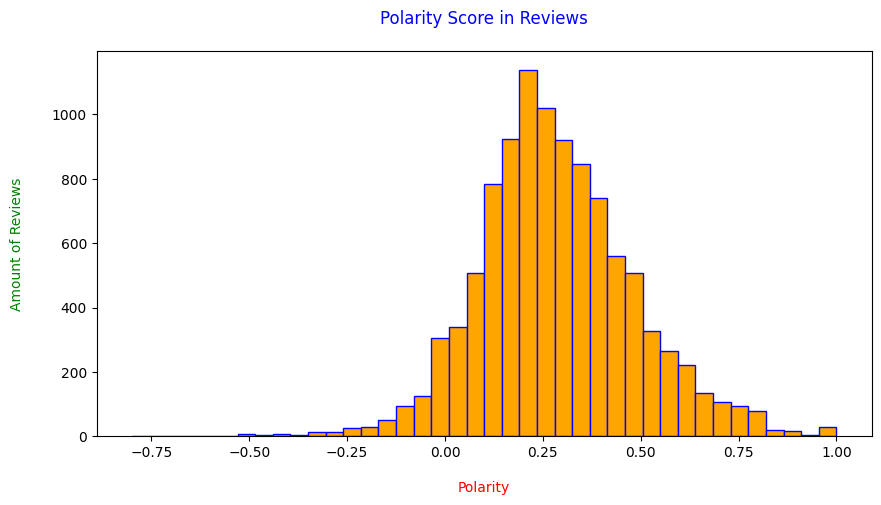

In [20]:
dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

*Các đánh giá có mức độ phân cực tiêu cực sẽ nằm trong khoảng [-1, 0), các đánh giá trung lập sẽ là 0.0, và các đánh giá tích cực sẽ nằm trong khoảng (0, 1].*

*Từ biểu đồ histogram ở trên, chúng ta biết rằng phần lớn các đánh giá có xu hướng tích cực, điều này xác nhận rằng những gì chúng ta phân tích trước đó là đúng. Về mặt thống kê, biểu đồ này cho thấy dữ liệu của chúng ta phân bố gần như chuẩn, nhưng không theo phân phối chuẩn tiêu chuẩn. Tóm lại, chúng ta có thể chắc chắn rằng phân tích của mình về số lượng cảm xúc trong các đánh giá là chính xác và phù hợp với biểu đồ trên.*

Review Length

In [21]:
dataset["length"] = dataset["reviews"].astype(str).apply(len)

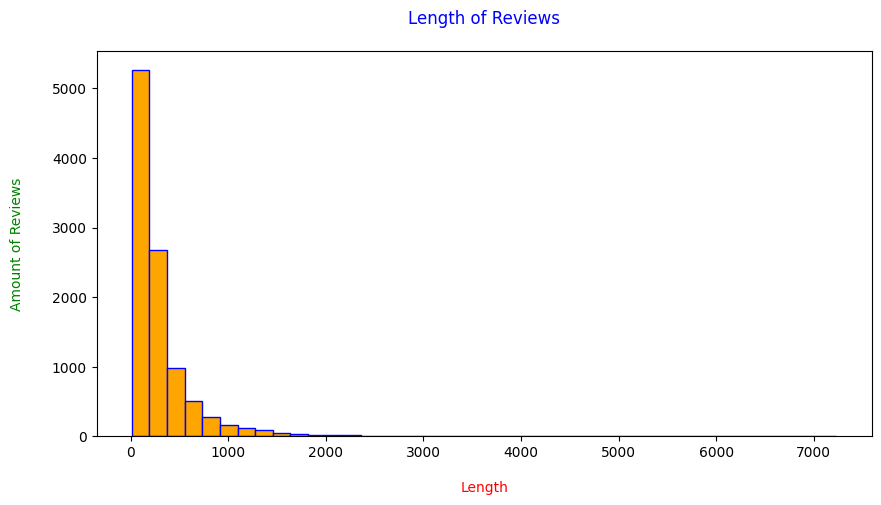

In [22]:
dataset["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

*Chúng ta thấy rằng các đánh giá có độ dài văn bản dao động trong khoảng từ 0 đến khoảng 1000 ký tự. Phân phối này có độ lệch dương, hay nói cách khác là bị lệch về bên phải, điều này có nghĩa là các đánh giá hiếm khi có độ dài vượt quá 1000 ký tự. Tất nhiên, các đánh giá mà chúng ta sử dụng ở đây đã chịu ảnh hưởng bởi giai đoạn tiền xử lý văn bản, vì vậy độ dài có thể không phản ánh chính xác độ dài thực tế của bài đánh giá, do một số từ có thể đã bị lược bỏ. Điều này cũng sẽ ảnh hưởng tương tự khi chúng ta đếm tổng số từ trong các đánh giá.*

Word Counts

In [23]:
dataset["word_counts"] = dataset["reviews"].apply(lambda x: len(str(x).split()))

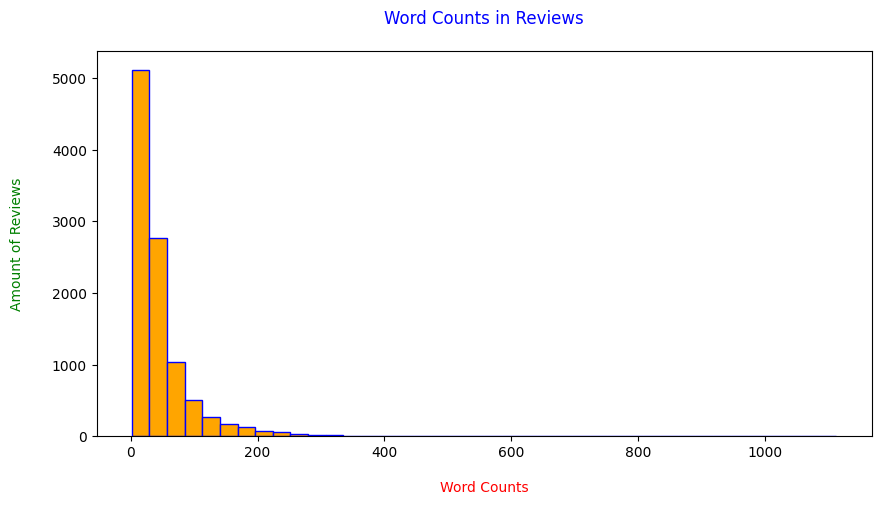

In [24]:
dataset["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()



---



# N-Gram Analysis

**N-Gram Function**

In [25]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  # Convert Stopwords set to a list
  Vectorizer = CountVectorizer(stop_words = list(Stopwords), ngram_range=(Gram,Gram))  

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

**Filter The DataFrame Based On Sentiments**

In [26]:
# Use dropna() so the base DataFrame is not affected
Positive = dataset[dataset["sentiment"] == "Positive"].dropna()
Neutral = dataset[dataset["sentiment"] == "Neutral"].dropna()
Negative = dataset[dataset["sentiment"] == "Negative"].dropna()

**Unigram of Reviews Based on Sentiments**

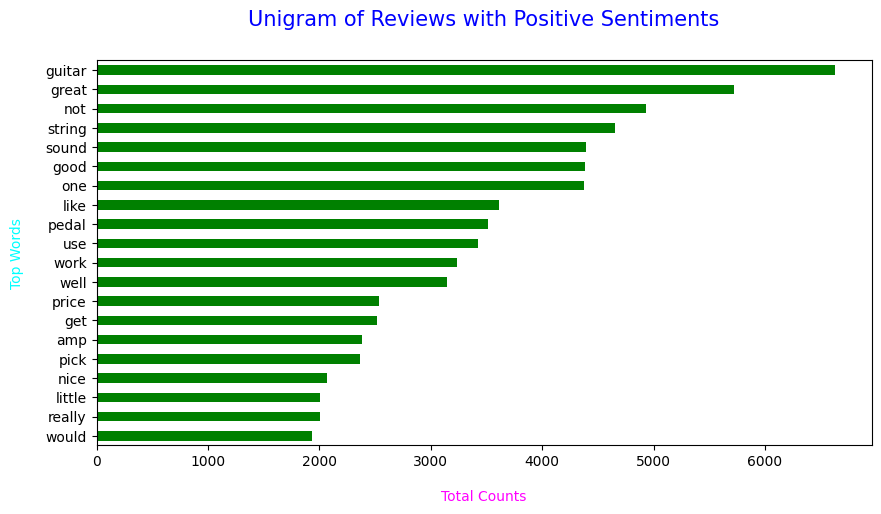

In [27]:
# Finding Unigram
words = Gram_Analysis(Positive["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

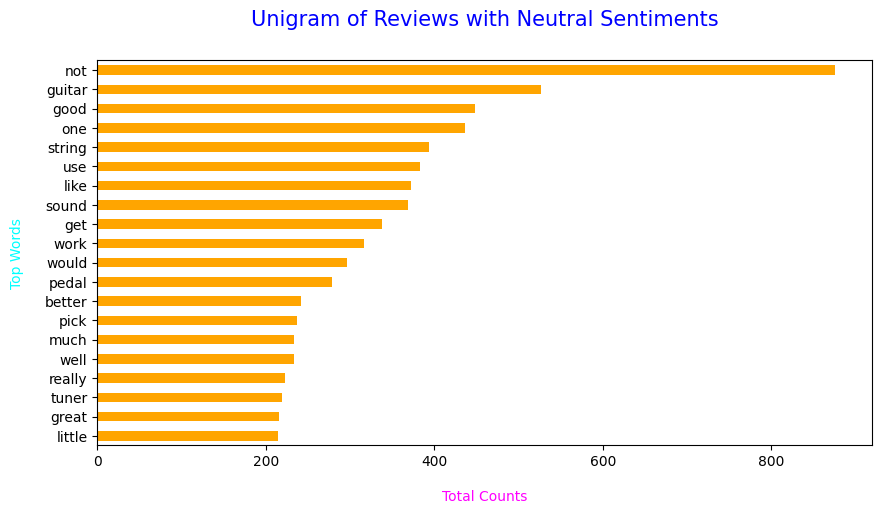

In [28]:
# Finding Unigram
words = Gram_Analysis(Neutral["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

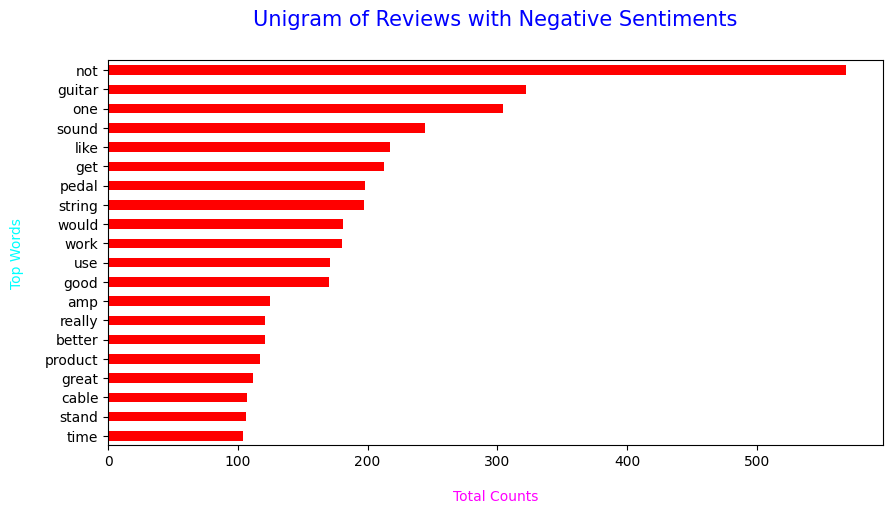

In [29]:
# Finding Unigram
words = Gram_Analysis(Negative["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

*Các unigram này không thực sự chính xác, vì chúng ta có thể thấy rõ rằng ngay cả đối với cảm xúc tích cực, unigram xuất hiện nhiều nhất là từ guitar, vốn là một danh từ chỉ đồ vật. Tuy nhiên, từ đây chúng ta cũng có thể suy ra rằng mặt hàng được mua nhiều nhất là đàn guitar hoặc các phụ kiện đi kèm với nó. Chúng ta nên thử phân tích bigram để xem mức độ chính xác của chúng trong việc mô tả từng loại cảm xúc.*

**Bigram of Reviews Based On Sentiments**

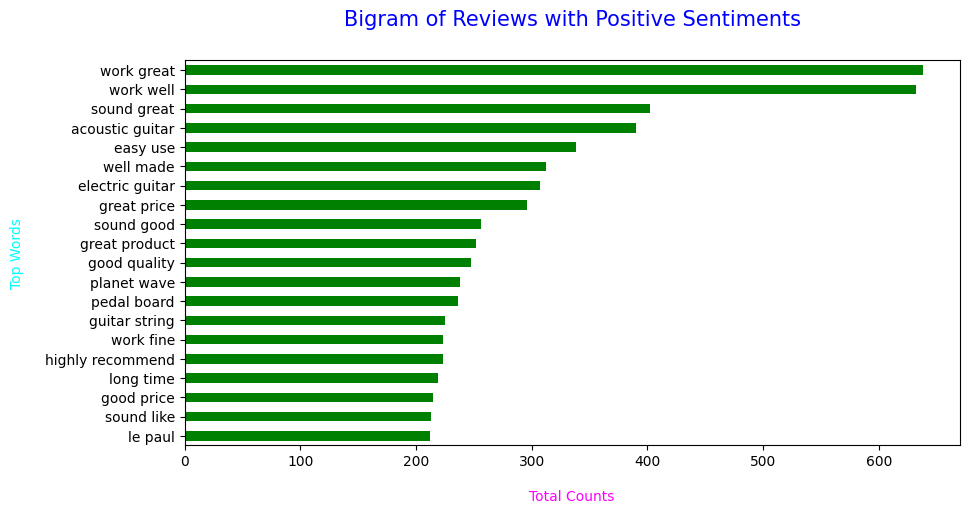

In [30]:
# Finding Bigram
words = Gram_Analysis(Positive["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

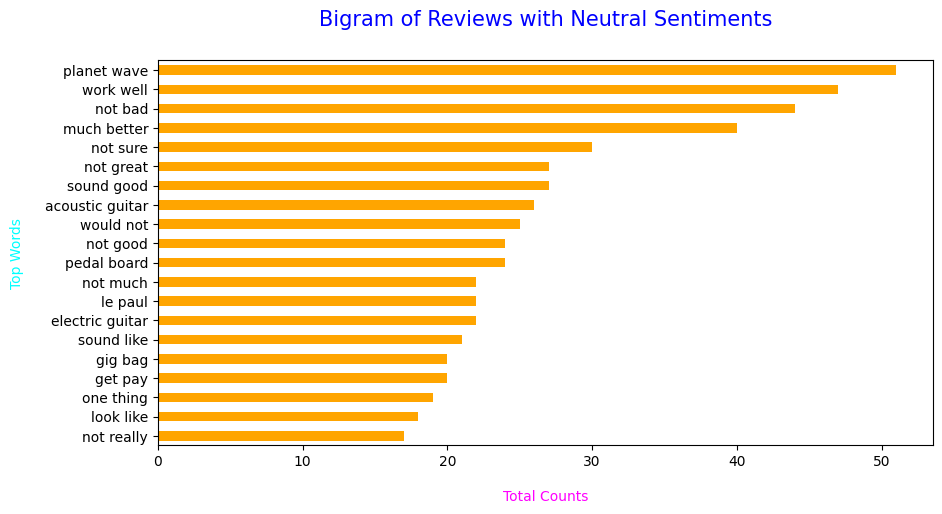

In [31]:
# Finding Bigram
words = Gram_Analysis(Neutral["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Bigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

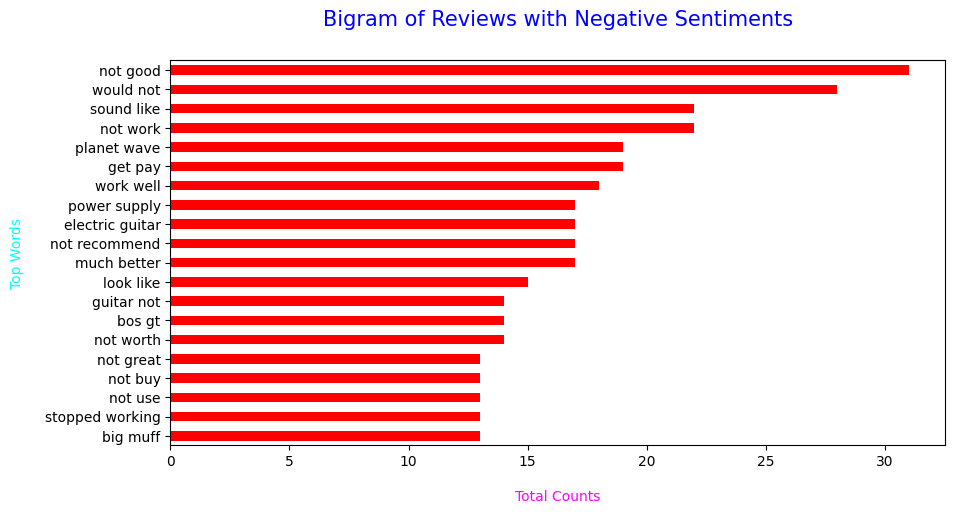

In [32]:
# Finding Bigram
words = Gram_Analysis(Negative["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

*Các bigram hoạt động hiệu quả hơn so với unigram, vì chúng ta có thể thấy rõ một số cụm từ thực sự mô tả cảm xúc tích cực. Tuy vậy, ở một số phần, chúng ta vẫn thấy các từ liên quan đến đàn guitar xuất hiện trong top đầu, điều này càng củng cố nhận định rằng các mặt hàng bán chạy nhất có liên quan đến guitar.*

**Trigram of Reviews Based On Sentiments**

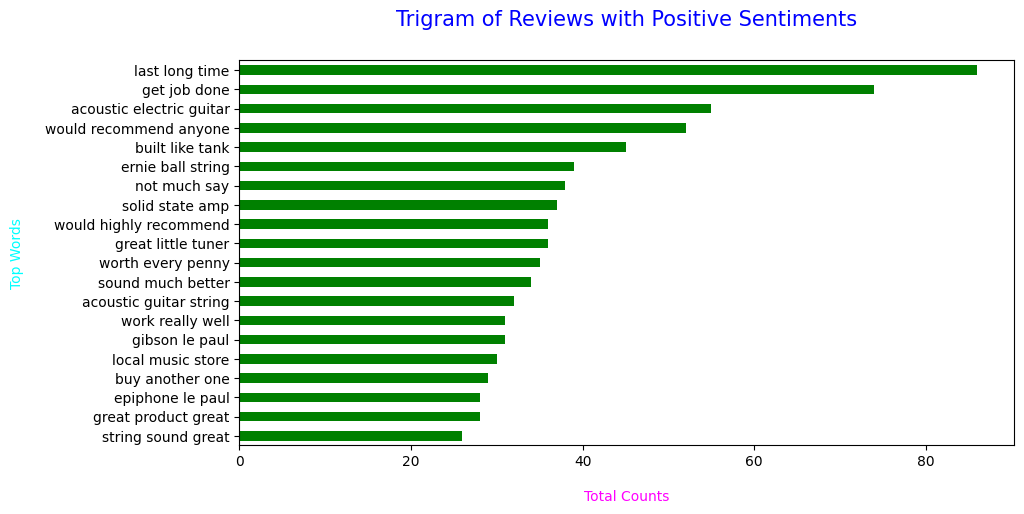

In [33]:
# Finding Trigram
words = Gram_Analysis(Positive["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

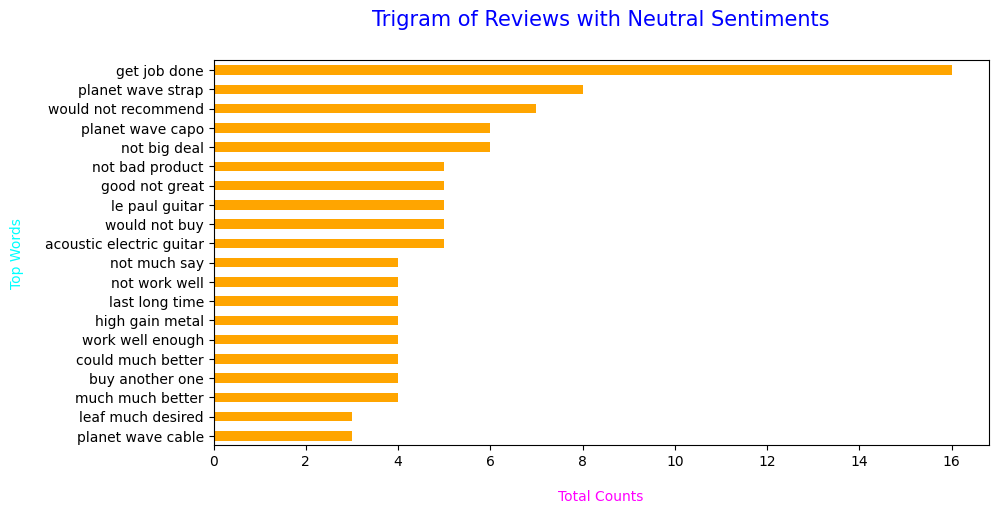

In [34]:
# Finding Trigram
words = Gram_Analysis(Neutral["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Trigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

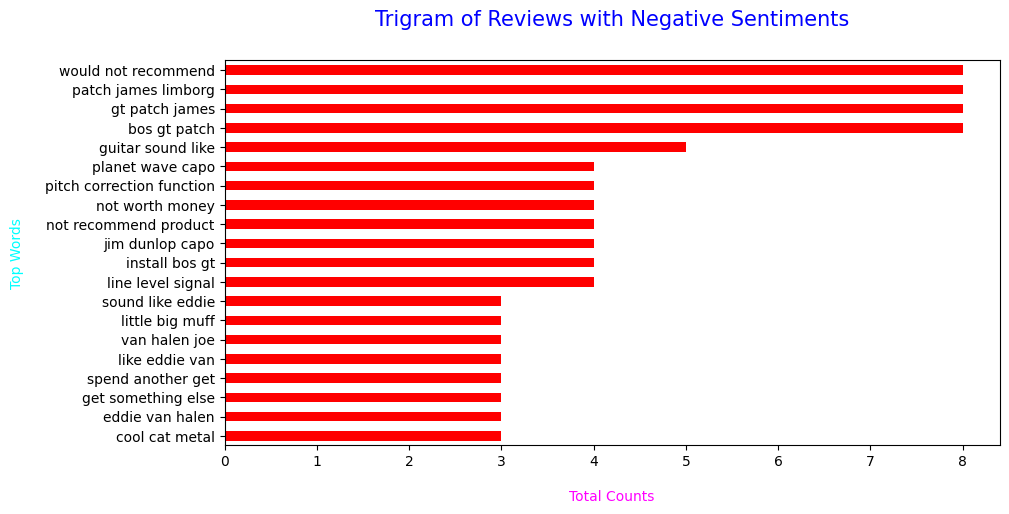

In [35]:
# Finding Trigram
words = Gram_Analysis(Negative["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Trigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

*Chúng ta có thể nói rằng các trigram mô tả cảm xúc tốt hơn một chút, mặc dù các trigram mang cảm xúc tiêu cực chủ yếu nói về các sản phẩm kém chất lượng — điều mà chúng ta có thể suy ra từ các từ xuất hiện nhiều nhất ở trên. Từ phân tích N-Gram, chúng ta cũng thấy được quyết định không loại bỏ từ not khỏi danh sách stopwords đã ảnh hưởng đến dữ liệu như thế nào, bởi vì điều này giúp chúng ta giữ lại ý nghĩa phủ định trong các cụm từ.*



---



# Word Clouds

**Word Cloud of Reviews with Positive Sentiments**

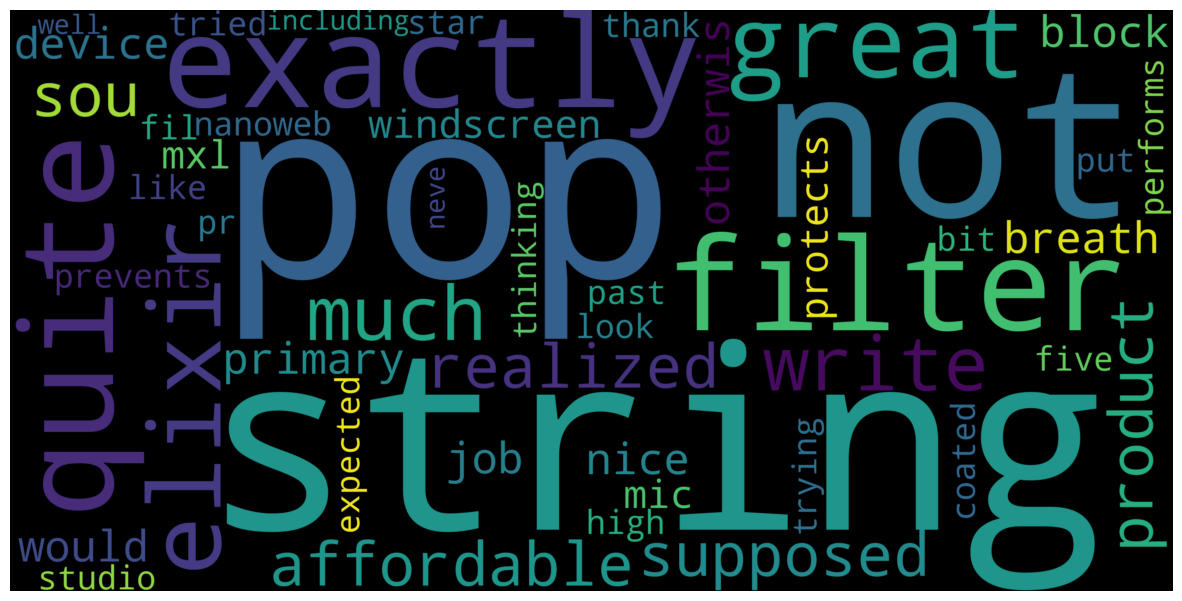

In [36]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

**Word Cloud of Reviews with Neutral Sentiments**

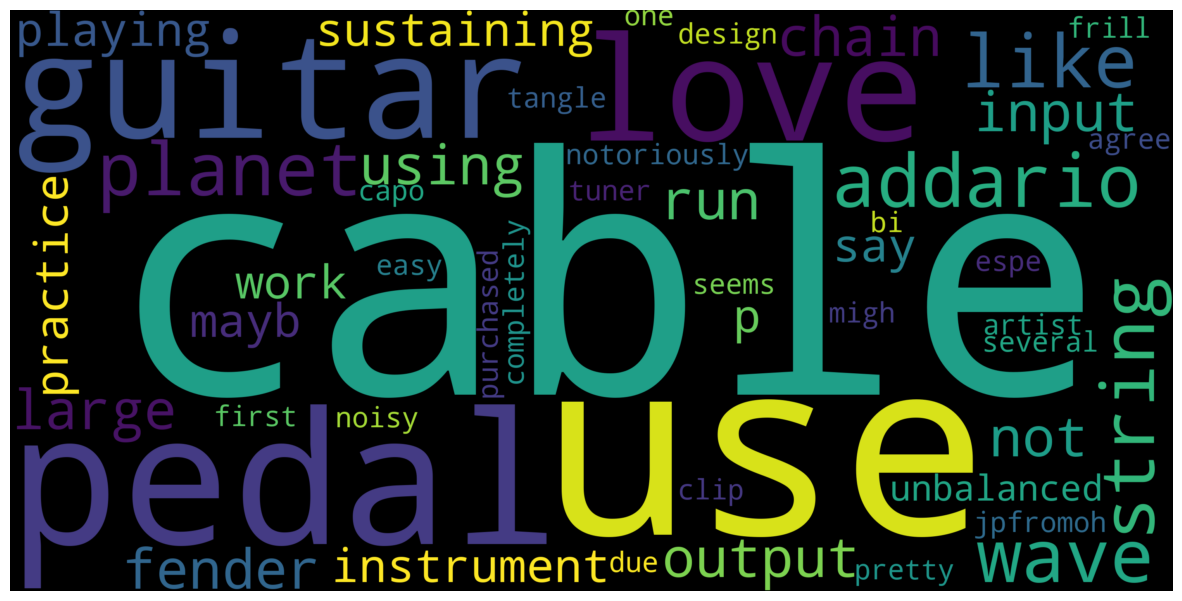

In [37]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

**Word Cloud of Reviews with Negative Sentiments**

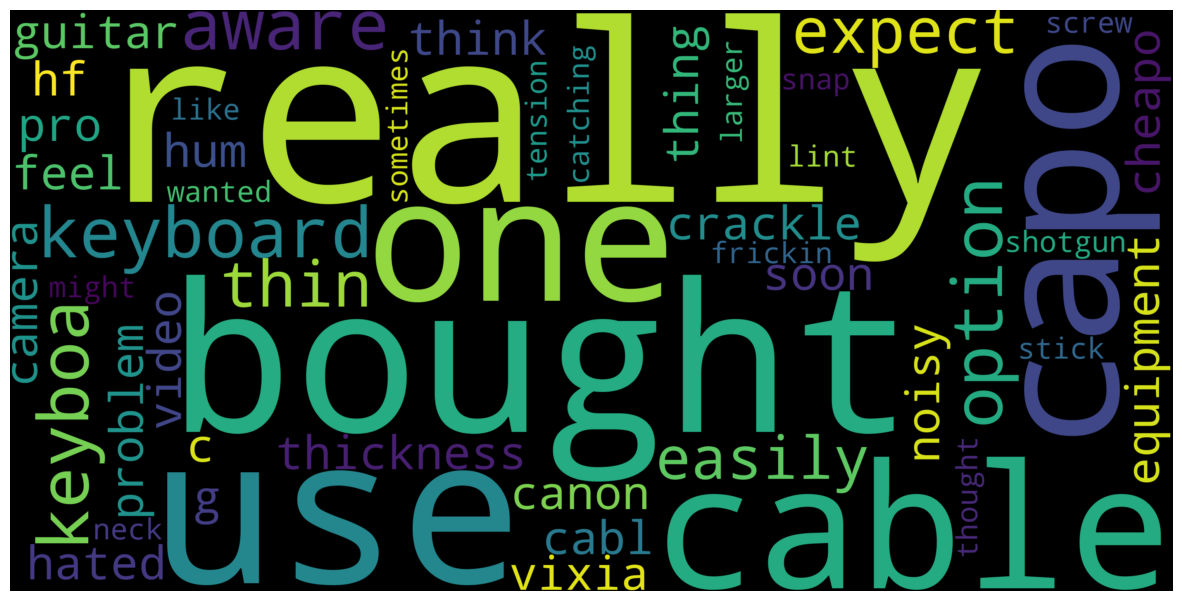

In [38]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()



---

